In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [4]:
import scripts.fsystem
import scripts.statistics

In [5]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"
dnames = ["WT-1", "WT-2", "WT-3", "G150A-1", "G150A-2", "G150A-3", "G150T-1", "G150T-2", "G150T-3"]

In [7]:
data = np.zeros((9,9))

## Get CCLLM
for idx, dname in enumerate(dnames):
    path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca_map1.dsdata"%(workdir,dname)
    path_llm = scripts.fsystem.H5manager.reader(path_dsdata,"lunus_llm_refmac5")
    
    with h5py.File(path_llm,"r") as f:
        data[idx,0,] = f["lunus_llm_zero_cc"][()]
        data[idx,1,] = f["lunus_llm_zero_gamma_A"][()]
        data[idx,2,] = f["lunus_llm_zero_sigma_A"][()]
        data[idx,3,] = f["lunus_llm_iso_cc"][()]
        data[idx,4,] = f["lunus_llm_iso_gamma_A"][()]
        data[idx,5,] = f["lunus_llm_iso_sigma_A"][()]
        data[idx,6,] = f["lunus_llm_aniso_cc"][()]
        data[idx,7,] = f["lunus_llm_aniso_gamma_A"][()]
        data[idx,8,] = f["lunus_llm_aniso_sigma_A"][()]

## Print the data
for x in data:
    print " ".join([str(round(i,5)).ljust(8) for i in x])

0.6417   6.69198  0.32048  0.66418  7.88579  0.00601  0.65279  8.038    0.00348 
0.64476  6.45697  0.33144  0.67051  7.59036  0.0021   0.66416  7.30632  0.00315 
0.63704  7.05773  0.32786  0.66415  8.18679  0.00402  0.62115  8.98437  0.10678 
0.64626  6.9332   0.33065  0.65349  8.23809  0.00211  0.64395  8.42949  0.00348 
0.62682  6.78443  0.31837  0.6473   7.84794  0.00346  0.61842  8.26835  0.0023  
0.65623  6.99018  0.34556  0.67688  7.95875  0.00305  0.67334  7.54788  0.00309 
0.64746  7.508    0.33662  0.68446  8.33716  0.00462  0.65976  8.95918  0.01089 
0.65402  7.78229  0.34901  0.68428  8.77215  0.00711  0.65904  9.57294  0.00922 
0.67239  7.48471  0.34737  0.71597  8.20995  0.00606  0.70762  8.49911  0.00692 


In [8]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple",\
          "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]

dpi =  483


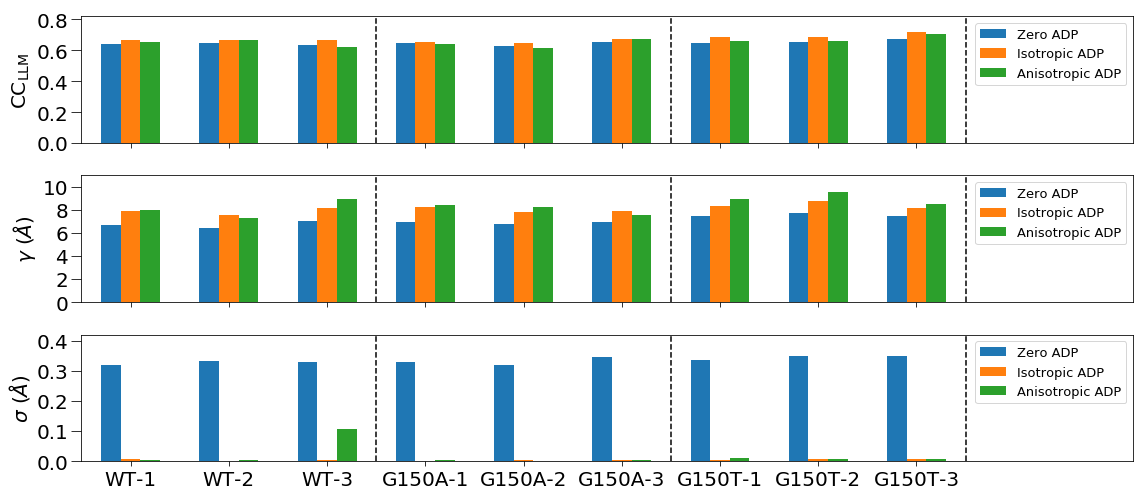

In [9]:
plt.figure(figsize=(16,7))

stats = data.copy()
##################################### plot CCllm
plt.subplot(3,1,1)
plt.bar(np.arange(9)-0.2, stats[:,0],width=0.2,color=colors[0],label="Zero ADP")
plt.bar(np.arange(9), stats[:,3],width=0.2,color=colors[1],label="Isotropic ADP")
plt.bar(np.arange(9)+0.2, stats[:,6],width=0.2,color=colors[2],label="Anisotropic ADP")
plt.ylabel("CC$_{\mathrm{LLM}}$", fontsize=20)
plt.xticks(np.arange(9),[], fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.5,10.2)
plt.ylim(0,0.82)
plt.legend(fontsize=13)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.axvline(x=2.5,linestyle="--",color="black")
plt.axvline(x=5.5,linestyle="--",color="black")
plt.axvline(x=8.5,linestyle="--",color="black")
plt.tight_layout()
##################################### plot gamma (\AA)
plt.subplot(3,1,2)
plt.bar(np.arange(9)-0.2, stats[:,1],width=0.2,color=colors[0],label="Zero ADP")
plt.bar(np.arange(9), stats[:,4],width=0.2,color=colors[1],label="Isotropic ADP")
plt.bar(np.arange(9)+0.2, stats[:,7],width=0.2,color=colors[2],label="Anisotropic ADP")
plt.ylabel("$\gamma$ ($\AA$)", fontsize=20)
plt.xticks(np.arange(9),[], fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.5,10.2)
plt.ylim(0,11)
plt.legend(fontsize=13)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.axvline(x=2.5,linestyle="--",color="black")
plt.axvline(x=5.5,linestyle="--",color="black")
plt.axvline(x=8.5,linestyle="--",color="black")
plt.tight_layout()
##################################### plot sigma (\AA)
plt.subplot(3,1,3)
plt.bar(np.arange(9)-0.2, stats[:,2],width=0.2,color=colors[0],label="Zero ADP")
plt.bar(np.arange(9), stats[:,5],width=0.2,color=colors[1],label="Isotropic ADP")
plt.bar(np.arange(9)+0.2, stats[:,8],width=0.2,color=colors[2],label="Anisotropic ADP")
plt.ylabel("$\sigma$ ($\AA$)", fontsize=20)
plt.xticks(np.arange(9),dnames, fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.5,10.2)
plt.ylim(0,0.42)
plt.legend(fontsize=13)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.axvline(x=2.5,linestyle="--",color="black")
plt.axvline(x=5.5,linestyle="--",color="black")
plt.axvline(x=8.5,linestyle="--",color="black")
plt.tight_layout()

##################################### 
fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_08_LLM_Result.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_08_LLM_Result.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()